<a href="https://colab.research.google.com/github/h-a-r-s-h-p/Pytorch/blob/master/linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Linear Regression without optim and dataloader


import torch, torchvision
import numpy as np
inputs=torch.tensor([[73.0,67,43],
       [91,88,64],
       [87,134,58],
       [102,43,37],
       [69,96,70]])
targets=torch.tensor([[56.0,70],
                      [81,101],
                      [119,133],
                      [22,37],
                      [103,119]])
# print(inputs)
# print(targets)
weights=torch.randn(2,3,requires_grad=True)
bias=torch.randn(2,requires_grad=True)
# print("weights= ",weights)
# print("weights transpose= ",weights.T)
def rms(pred):
  diff=pred-targets
  return torch.sqrt(torch.sum(diff*diff)/pred.numel())


for epoch in range(2000):
    pred=inputs@(weights.T)+bias
    error=rms(pred)
    error.backward()
    with torch.no_grad():
        weights-=weights.grad*0.0001
        bias-=bias.grad*0.0001
        weights.grad.zero_()
        bias.grad.zero_()
pred=inputs@weights.T+bias
print("targets= ",targets)
print("predictions= ",pred)
print("rms= ",rms(pred))

targets=  tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
predictions=  tensor([[ 66.2267,  72.9874],
        [ 61.2039, 108.5132],
        [151.8900, 110.8151],
        [ 71.7962,  53.1780],
        [ 35.6286, 123.3527]], grad_fn=<AddBackward0>)
rms=  tensor(30.7165, grad_fn=<SqrtBackward>)


In [4]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

Parameter containing:
tensor([[ 0.5682,  0.2972, -0.1591],
        [ 0.5006,  0.2687, -0.4479]], requires_grad=True)


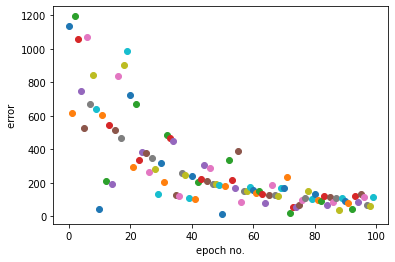

In [6]:
#Linear regression with optim and dataloader

inputs=torch.tensor([[73.0,67,43],
                     [91,88,64],
                     [87,134,58],
                     [102,43,37],
                     [69,96,70],
                     [73.0,67,43],
                     [91,88,64],
                     [87,134,58],
                     [102,43,37],
                     [69,96,70],
                     [73.0,67,43],
                     [91,88,64],
                     [87,134,58],
                     [102,43,37],
                     [69,96,70]])

targets=torch.tensor([[56.0,70],
                      [81,101],
                      [119,133],
                      [22,37],
                      [103,119],
                      [56.0,70],
                      [81,101],
                      [119,133],
                      [22,37],
                      [103,119],
                      [56.0,70],
                      [81,101],
                      [119,133],
                      [22,37],
                      [103,119]])

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F

train_tds=TensorDataset(inputs,targets)
# print(train_tds[:3])

train_dl=DataLoader(train_tds,5,shuffle=True)
# for xt,yt in train_dl:
#     print(xt)
#     print(yt)

model=nn.Linear(3,2)
print(model.weight)
loss_fn=F.mse_loss
opt=torch.optim.SGD(model.parameters(),1e-5)
# loss=loss_fn(model(inputs),targets)
# print(loss)
for epochs in range(100):
    for xb,yb in train_dl:
        pred=model(xb)
        loss=loss_fn(pred,yb)
        loss.backward()
        opt.step()
        opt.zero_grad()
    plt.scatter(epochs,loss.item())
plt.xlabel("epoch no.")
plt.ylabel(" error ")
plt.show()


In [ ]:
pred=model(inputs)
print(targets)
print(pred)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
tensor([[ 57.8042,  71.8871],
        [ 82.8208, 101.1777],
        [116.2753, 128.9562],
        [ 24.2515,  46.8886],
        [101.2517, 114.1775],
        [ 57.8042,  71.8871],
        [ 82.8208, 101.1777],
        [116.2753, 128.9562],
        [ 24.2515,  46.8886],
        [101.2517, 114.1775],
        [ 57.8042,  71.8871],
        [ 82.8208, 101.1777],
        [116.2753, 128.9562],
        [ 24.2515,  46.8886],
        [101.2517, 114.1775]], grad_fn=<AddmmBackward>)


In [ ]:
model(torch.tensor([[75,63,44.]]))

tensor([[54.6434, 69.6568]], grad_fn=<AddmmBackward>)